# Current Analysis

In [1]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import xarray as xr
import cmocean
import os
import errno
import pickle
from salishsea_tools import viz_tools
from salishsea_tools import geo_tools
from salishsea_tools import grid_tools
from salishsea_tools import utilities
%matplotlib inline
speed_cmap = cmocean.cm.speed

In [ ]:
u_rawhr = xr.open_dataset("https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSg3DuGridFields1hV18-06").isel(depth = 0)
#u_datahr = u_rawhr.sel(time=u_rawhr.time.dt.year.isin([2015]))
u_datahr = u_rawhr.sel(time=u_rawhr.time.dt.year.isin([2015]))
u_datahr = u_datahr.sel(time=u_datahr.time.dt.month.isin([1]))

In [ ]:
v_rawhr = xr.open_dataset("https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSg3DvGridFields1hV18-06").isel(depth = 0)
v_datahr = v_rawhr.sel(time=v_rawhr.time.dt.year.isin([2015]))
v_datahr = v_datahr.sel(time=v_datahr.time.dt.month.isin([1]))

In [ ]:
mag_hr = xr.ufuncs.sqrt(xr.ufuncs.square(u_datahr) + xr.ufuncs.square(v_datahr))

In [ ]:
u_raw20 = xr.open_dataset("https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSgNearSurfaceUVelocity20mV18-06")
u_data20 = u_raw20.sel(time=u_raw20.time.dt.year.isin([2015]))
u_data20 = u_data20.sel(time=u_data20.time.dt.month.isin([1]))

In [ ]:
v_raw20 = xr.open_dataset("https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSgNearSurfaceUVelocity20mV18-06")
v_data20 = v_raw20.sel(time=v_raw20.time.dt.year.isin([2015]))
v_data20 = v_data20.sel(time=v_data20.time.dt.month.isin([1]))

In [2]:
unpickle = open("/home/abhudia/Desktop/u_data20_data.pickle", "rb")
u_20 = pickle.load(unpickle)

In [3]:
unpickle = open("/home/abhudia/Desktop/u_datahr.pickle", "rb")
u_hr = pickle.load(unpickle)

In [6]:
u_20a = u_20.values[0]

In [7]:
u_hra = u_hr.values[0]

In [8]:
mean20 = np.mean(u_20a, axis = 0)

In [9]:
mean20.shape

(540, 355)

In [10]:
meanhr = np.mean(u_hra, axis = 0)

In [11]:
meanhr.shape

(898, 398)

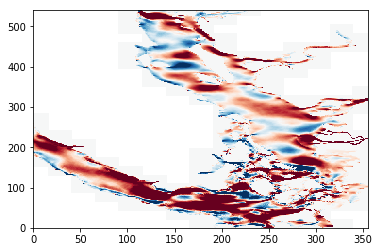

In [23]:
plt.pcolormesh(mean20, cmap = 'RdBu', vmin = -0.1, vmax = 0.1)

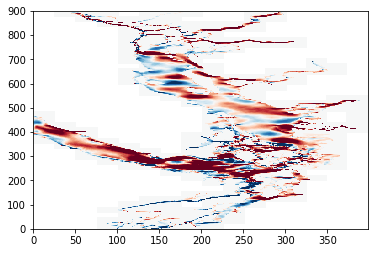

In [22]:
plt.pcolormesh(meanhr, cmap = 'RdBu', vmin = -0.1, vmax = 0.1)